# Part II - On time performance flights and the factors effecting to delayed flights
## by Thien Huynh

## Investigation Overview

> Flights on time performance and the factors effecting to delayed flights shall be presented.


## Dataset Overview

> The dataset name is "Airline On-Time Performance Data". This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 1987 to 2008. The dataset can be downloaded from website https://www.transtats.bts.gov/ directly. In this project, data flights in 2007 and plane-data are used. Flights in 2007 has 29 columns and 7,453,215 rows to describe information of each flight. Plane data has 9 columns and 5029 rows to highlight the information of aircrafts.

In [1]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load datasets to dataframe
# Flights containing detail information of each flight 
flights_2007 = pd.read_csv('2007.csv', sep=",")

# Plane_data containing detail information of aircrafts
plane_data = pd.read_csv('plane-data.csv', sep=",")

In [3]:
# Create a common function for the lables of charts to re-use and avoid repeat code too much
def chart_labels(x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

# Create common base color
base_color = sb.color_palette()[0] 

## Overview On time Performance

> There is 42% delayed flights in 2007, which is a remarkable percentage. Nearly 50% in total and the big question is "How can we reduce the amount of Delayed Flight so that:
1. Customer Experience can be improved
2. Better planning and adjustment for flights can be performed correctly
3. Identify traits and patterns so proper arrangement regarding resources can be stated

array([<Axes: ylabel='Is_Delay'>], dtype=object)

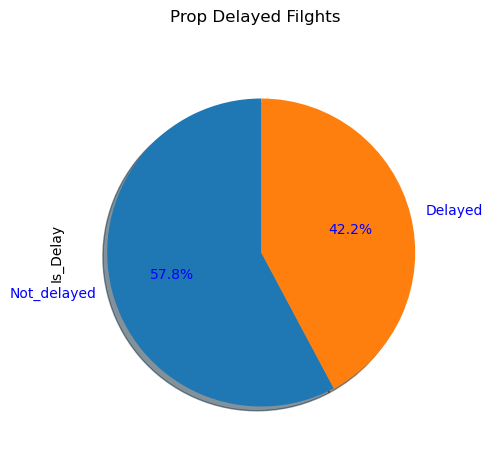

In [4]:
# Create a column, name [is_delay] = 'True' when departure delay > 0, else False.
flights_2007['Is_Delay'] = (flights_2007['DepDelay'] > 0).astype('int32')
labels = 'Not_delayed', 'Delayed'

# Plot pie chart % delayed flights compared to total flights
flights_2007['Is_Delay'].value_counts().plot.pie(subplots = True, labels = labels, figsize = (5, 5), title = 'Prop Delayed Filghts', textprops = {'color':"b"}, autopct = '%1.1f%%', shadow = True, startangle = 90)

## Departure Delayed Flights by Time (Month, Day of Week)

> Accourding to the observation, in the Month of June, July, August (Summer Holiday) and December (Christmas and New Year) are the months which had the most delayed flights. 

> Friday (5) is the most delayed day due to weekend.

From the depicted above, we can tell that there needs to be a better plan, e.g: more flights and more timeframe for passengers to be onboard, flexibility in changing flights and customers on-call is also not a bad idea as well

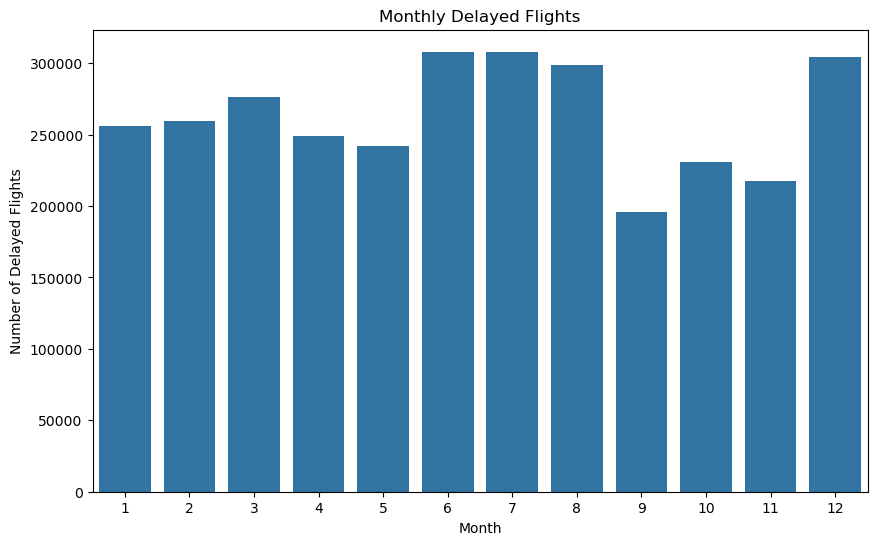

In [5]:
# Selecting delayed flights (flights had departure delay > 0) to focus on analytics on time performance
flights_dep_delay=flights_2007[flights_2007['DepDelay'] > 0]

# Count the number of Month based on delayed flights
plt.figure(figsize = [10, 6])
sb.countplot(data = flights_dep_delay, x = 'Month', color = base_color)
chart_labels('Month', 'Number of Delayed Flights', 'Monthly Delayed Flights')

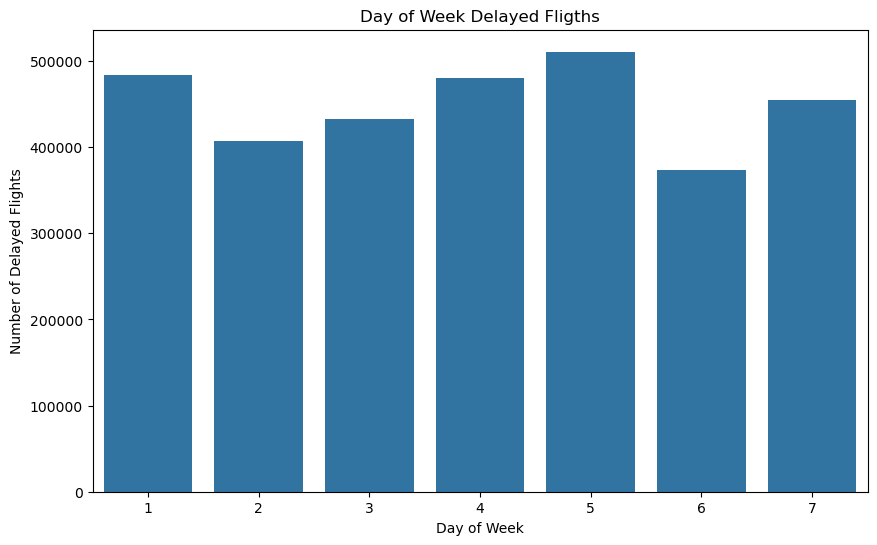

In [6]:
# Count Day of Week based on delayed flights
plt.figure(figsize = [10, 6])
sb.countplot(data = flights_dep_delay, x = 'DayOfWeek', color = base_color)
chart_labels('Day of Week', 'Number of Delayed Flights', 'Day of Week Delayed Fligths')

## Delays by Airlines, Departure Airports, Manufacturer and Delay Types

> Airlines code WN is the most delayed airlines, the number of delayed flights of this airlines is twice more in comparision to other airlines.

As we can see, a funny thing is the airline code WN causing an astonishing surge in delay... Googling it out, we can see that
'The airline code "WN" belongs to Southwest Airlines. Southwest Airlines is a major low-cost airline based in the United States and is known for its distinctive branding and livery.' ... pay attention to 'low-cost' term, this shall be a key point in why the service is not very good and delays happen too often

In [7]:
# Count Day of Week based on delayed flights
plt.figure(figsize = [10, 6])
order_airline = flights_dep_delay['UniqueCarrier'].value_counts().index
sb.countplot(data = flights_dep_delay, x = 'UniqueCarrier', color = base_color, order = order_airline)
chart_labels('Airlines', 'Number of Delayed Flights', 'Delayed Fligths by Airlines')

## Delays by Departure Airports
> Top 3 departure airports that had high average delay minutes is EWR, ORD, and DFW. 

For better or worse, lets take this observation as a reference to ensure our flights in case we have to set foot in these airports.


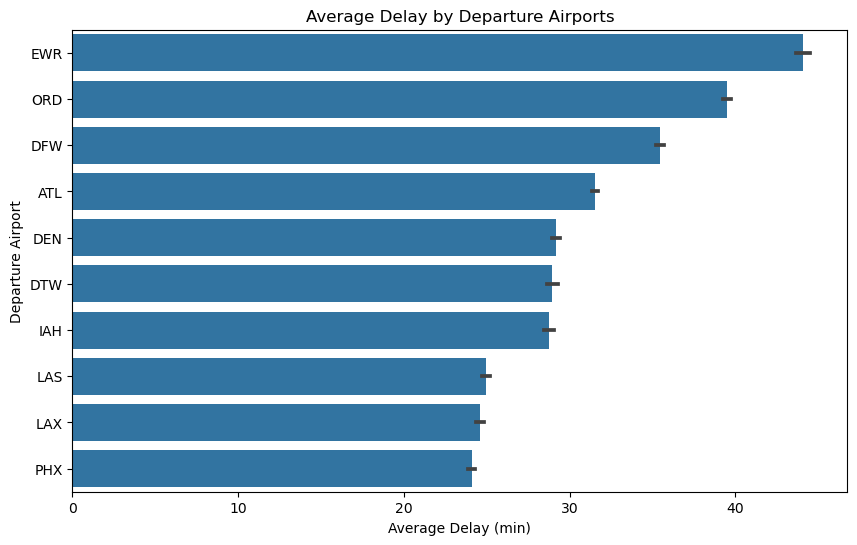

In [8]:
# Select top 10 delayed departure airports in the total of delayed flights.
top10_delayed_airports = flights_dep_delay.Origin.value_counts().nlargest(10).index.tolist()

# Create a df containing flights in the list of top 20 delayed departure airports
flights_top10_delayed_airports = flights_dep_delay[flights_dep_delay.Origin.isin(top10_delayed_airports)]

#Create order to easy find out which is the departure airport had the most delay
order_top10 = flights_top10_delayed_airports.groupby(['Origin']).DepDelay.mean().sort_values(ascending=False).index

# Barplot
plt.figure(figsize = [10, 6])
sb.barplot(data = flights_top10_delayed_airports, y = 'Origin', x = 'DepDelay', color = base_color, order = order_top10)
chart_labels('Average Delay (min)', 'Departure Airport', 'Average Delay by Departure Airports' )

## Delays by Aircraft Manufacturers
>  Top 3 manufacturer that has high average delay minutes is PAIR MIKE E, AEROSPATIALE and SIKORSKY. The most attention is BOEING and AIRBUS (top aircrafts manufacturer of the world) sure consume a low average delay per minutes. Therefore, manufacturer does impact the delay by technical issues. However, I don't think this is a major criteria in delay ... just take it as an example


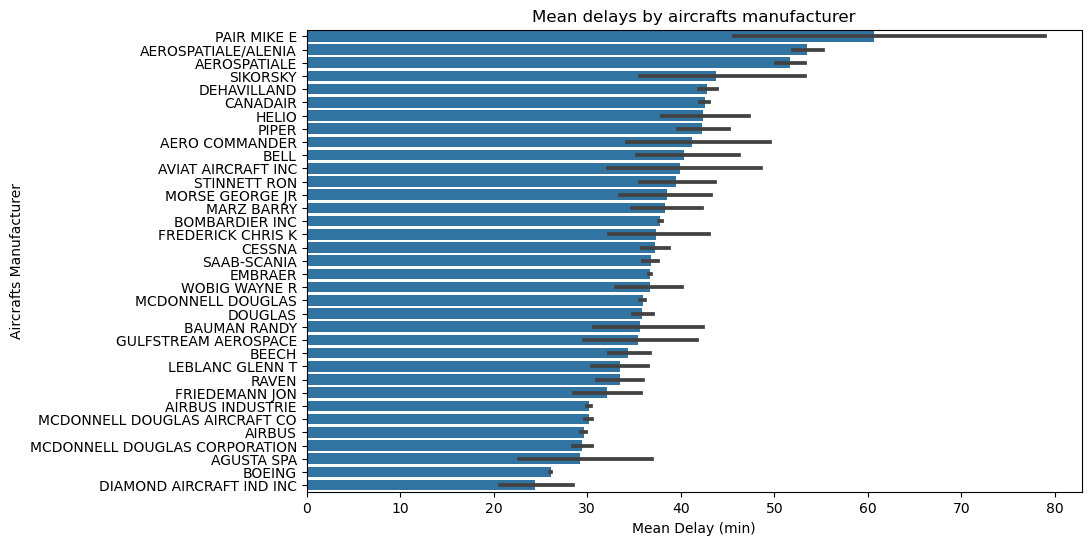

In [9]:
# Rename column primary key on plane-data before join to flights, TailNum is aircraft code
plane_data = plane_data.rename(columns = {"tailnum": "TailNum"})

# Join flights dep delay to plane data to get detail information about aircraft
flights_plane_delay = pd.merge(flights_dep_delay, plane_data, on = ['TailNum'], how = 'left')

# Create order to easy find out which is the aircraft manufacturer had the most delay
order_manu = flights_plane_delay.groupby(['manufacturer']).DepDelay.mean().sort_values(ascending = False).index

# Plot
plt.figure(figsize = [10, 6])
sb.barplot(data = flights_plane_delay, y = 'manufacturer', x = 'DepDelay', color = base_color, order = order_manu)
chart_labels('Mean Delay (min)', 'Aircrafts Manufacturer', 'Mean delays by aircrafts manufacturer')

## Conclusions
> - Regarding the scope 'On-time performance', we look directly to delayed flights. Departure airports, Airlines and aircraft manufacturer are the factors which also have impact to the delays.
> - Late aircraft and airlines are the top reasons causing delayed flights.
> - Delayed flights happened in Summer and Christmas/New Year, which is understandable since these are busy season for aviation industry in general.

In [ ]:
!jupyter nbconvert Part_II_Slide_presentation.ipynb --to slides --post serve --no-input --no-prompt